In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind
from IPython.display import display
import dataframe_image as dfi


In [4]:
data = pd.read_csv('PCC.individual.project.data.csv')
data =  data.loc[data['STUDYID'] != 'ASC']


In [5]:
# data.head()


In [6]:
# list(data.columns)

## Clean Data to get event free survival

In [7]:
def get_risk(patient):
    if patient.death == 1 and patient.time < 365:
        # Patient is high risk
        return 1
    # WAS: elif patient.death == 0 and patient.time > 730:
    elif patient.time > 730:
        # Patient is low risk
        return 0
    else:
        # Patient needs to be dropped, insufficient data
        return 'drop'


In [8]:
# data.apply(get_risk, axis=1)

In [9]:
data['high_risk'] = data.apply(get_risk, axis=1)
data = data.loc[lambda patient: patient.high_risk != 'drop']


In [10]:
data = data.drop(['time', 'death'], axis=1)

In [11]:
data.shape

(470, 104)

In [12]:
data.groupby('AGEGRP2').count()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
AGEGRP2,,,,,,,,,,,,,,,,,,,,,
0,159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,159,159,159,159
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
2,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99


In [13]:
data.groupby('ECOG_C').count()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
ECOG_C,,,,,,,,,,,,,,,,,,,,,
0,223,223,223,223,223,223,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
1,247,247,247,247,247,247,247,247,247,247,...,247,247,247,247,247,247,247,247,247,247


In [14]:
data.head()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
479,CELG,CELG-00004,27.9,169.0,79.6,4.127134,2.197225,2.772589,2.44,4.290459,...,0,0,0,1,0,0,0,0,1,1
482,CELG,CELG-00007,33.2,161.5,85.1,5.700444,5.141664,5.793014,1.80,5.420535,...,0,0,0,1,0,0,1,0,0,1
483,CELG,CELG-00008,25.2,167.9,67.6,4.406719,2.639057,3.044522,2.30,4.663439,...,0,0,0,1,0,0,1,0,0,1
499,CELG,CELG-00024,23.0,182.0,75.7,6.383507,2.639057,3.295837,2.25,4.060443,...,0,0,0,1,0,0,0,0,0,1
503,CELG,CELG-00028,22.5,170.0,65.0,6.877296,3.295837,3.761200,1.98,4.127134,...,0,0,0,1,0,1,0,0,0,1


/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='high_risk', ylabel='count'>

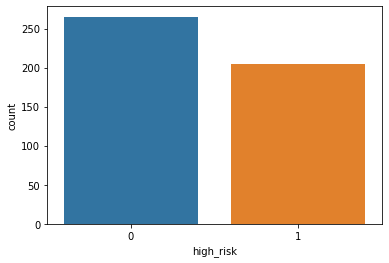

In [15]:
sns.countplot(data['high_risk'])

## Race

In [16]:
race = ['RaceAsian',
        'RaceBlack',
        'RaceOther',
        'RaceWhite']


In [17]:
def get_race(data):
    if data['RaceWhite'] == 1:
        return 'White'
    elif data['RaceBlack'] == 1:
        return 'Black'
    elif data['RaceAsian'] == 1:
        return 'Asian'
    else:
        return 'Other'

In [18]:
data['Race'] = data[race].apply(get_race, axis=1)


In [19]:
race_table = pd.crosstab(index=data['high_risk'], columns=data['Race'])
race_table

Race,Asian,Black,Other,White
high_risk,,,,
0,19,10,4,232
1,6,6,11,182


In [20]:
chi = chi2_contingency(race_table)
print("chi2:  %.2f \n p:  %.2f \n dof:  %.2f \n expected: " % (chi[0], chi[1],chi[2]))
print(chi[3])


chi2:  9.56 
 p:  0.02 
 dof:  3.00 
 expected: 
[[ 14.09574468   9.0212766    8.45744681 233.42553191]
 [ 10.90425532   6.9787234    6.54255319 180.57446809]]


## Region

In [21]:
region = ['RegionAsia',
          'RegionEastEuro',
          'RegionNorthAmer',
          'RegionSouthAmer',
          'RegionWestEuro']


In [22]:
def get_region(data):
    if data['RegionAsia'] == 1:
        return 'Asia'
    elif data['RegionEastEuro'] == 1:
        return 'EastEuro'
    elif data['RegionNorthAmer'] == 1:
        return 'NorthAmer'
    elif data['RegionSouthAmer'] == 1:
        return 'SouthAmer'
    else:
        return 'WestEuro'


In [23]:
data['Region'] = data[region].apply(get_region, axis=1)


In [24]:
region_table = pd.crosstab(
    index=data['high_risk'], columns=data['Region'], margins=True)
filename = "/Users/belalelsiesy/Desktop/Data Analysis/newData/region.png"
dfi.export(region_table, filename)
region_table


Region,EastEuro,NorthAmer,SouthAmer,WestEuro,All
high_risk,,,,,
0,48,39,39,139,265
1,50,37,19,99,205
All,98,76,58,238,470


In [25]:
chi = chi2_contingency(region_table)
print("chi2:  %.2f \n p:  %.2f \n dof:  %.2f \n expected: " % (chi[0], chi[1],chi[2]))

print(chi[3])


chi2:  6.15 
 p:  0.63 
 dof:  8.00 
 expected: 
[[ 55.25531915  42.85106383  32.70212766 134.19148936 265.        ]
 [ 42.74468085  33.14893617  25.29787234 103.80851064 205.        ]
 [ 98.          76.          58.         238.         470.        ]]


In [26]:
for i in range(101):
    print(" {0} - {1}".format(data.columns[i], data.iloc[200][i]))

 STUDYID - VEN
 RPT - VEN-343002102
 BMI - 36.4
 HEIGHTBL - 189.0
 WEIGHTBL - 130.0
 ALP - 3.891820298
 ALT - 3.17805383
 AST - 3.135494216
 CA - 2.41
 CREAT - 4.406719247
 HB - 14.6
 LDH - 5.192298174
 NEU - 1.190887565
 PLT - 213.0
 PSA - 2.988707659
 TBILI - 1.791759469
 TESTO - -0.713349888
 WBC - 1.854734268
 CREACL - 4.971087979
 NA. - 139.0
 MG - -0.116533816
 PHOS - 0.076961041
 ALB - 39.4
 TPRO - 71.8
 RBC - 4.635247172
 LYM - 0.627221905
 BUN - 1.819381218
 CCRC - 5.036056097
 GLU - 1.667706821
 SYSTOLICBP - 155.0
 DIASTOLICBP - 90.0
 PULSE - 76.5392603
 HEMAT - 0.44118385
 SPEGRA - 1.020414053
 LYMperLEU - 30.74740352
 MONO - 0.378907363
 MONOperLEU - 7.037158954
 NEUperLEU - 57.69328077
 POT - 4.3
 BASOperLEU - 0.488457042
 EOS - 0.112579001
 EOSperLEU - 2.164277782
 TARGET - 1
 LYMPH_NODES - 0
 KIDNEYS - 0
 LUNGS - 0
 LIVER - 0
 PLEURA - 0
 OTHER - 0
 PROSTATE - 1
 ORCHIDECTOMY - 1
 PROSTATECTOMY - 0
 LYMPHADENECTOMY - 0
 BILATERAL_ORCHIDECTOMY - 1
 PRIOR_RADIOTHERAPY - 0


# Chi-Square Test for Binary Variables

In [27]:
binary = ['TARGET',
'LYMPH_NODES',
'KIDNEYS',
'LUNGS',
'LIVER',
'PLEURA',
'OTHER',
'PROSTATE',
'ORCHIDECTOMY',
'PROSTATECTOMY',
'LYMPHADENECTOMY',
'BILATERAL_ORCHIDECTOMY',
'PRIOR_RADIOTHERAPY',
'ANALGESICS',
'ANTI_ANDROGENS',
'GLUCOCORTICOID',
'GONADOTROPIN',
'BISPHOSPHONATE',
'CORTICOSTEROID',
'IMIDAZOLE',
'ACE_INHIBITORS',
'BETA_BLOCKING',
'HMG_COA_REDUCT',
'ESTROGENS',
'ANTI_ESTROGENS',
'CEREBACC',
'CHF',
'DVT',
'DIAB',
'MI',
'PULMEMB',
'SPINCOMP',
'COPD',
'MHBLOOD',
'MHCARD',
'MHCONGEN',
'MHEAR',
'MHENDO',
'MHGASTRO',
'MHHEPATO',
'MHIMMUNE',
'MHINFECT',
'MHINJURY',
'MHINVEST',
'MHMETAB',
'MHPSYCH',
'MHRENAL',
'MHRESP',
'MHSKIN',
'MHVASC',
'ECOG_C',
'AGEGRP2'
]

In [28]:
binary_stats = pd.DataFrame(columns=['Name', 'chi-2','chi-p', 'Odds-Ratio','fisher-p'])


In [29]:
# binary_stats.loc[len(binary_stats.index)] = ['Hello',0.05, 6.07]


In [30]:
def analyse_binary(name):
    print(name)
    table = pd.crosstab(index=data['high_risk'], columns=data[name])
    disp_table = pd.crosstab(index=data['high_risk'], columns=data[name], margins=True)
    display(disp_table)
    chi = chi2_contingency(table)
    if (table.shape == (2,2)):
        oddsr, fisherP = fisher_exact(table)
        print('Fisher Exact Test: \n Odds: %.2f \n p: %.2f' % (oddsr, fisherP))
        binary_stats.loc[len(binary_stats.index)] = [name, chi[0], chi[1], oddsr, fisherP]
    else:
        binary_stats.loc[len(binary_stats.index)] = [
            name, chi[0], chi[1], np.NaN, np.NaN]
    print('\n')
    if (chi[1] <= 0.0005):
        filename = "/Users/belalelsiesy/Desktop/Data Analysis/newData/" + name + ".png"
        dfi.export(disp_table, filename)


In [31]:
for feature in binary:
    analyse_binary(feature)

TARGET


TARGET,0,1,All
high_risk,,,
0,116,149,265
1,63,142,205
All,179,291,470


Fisher Exact Test: 
 Odds: 1.75 
 p: 0.00


LYMPH_NODES


LYMPH_NODES,0,1,All
high_risk,,,
0,129,136,265
1,80,125,205
All,209,261,470


Fisher Exact Test: 
 Odds: 1.48 
 p: 0.04


KIDNEYS


KIDNEYS,0,1,All
high_risk,,,
0,263,2,265
1,202,3,205
All,465,5,470


Fisher Exact Test: 
 Odds: 1.95 
 p: 0.66


LUNGS


LUNGS,0,1,All
high_risk,,,
0,236,29,265
1,168,37,205
All,404,66,470


Fisher Exact Test: 
 Odds: 1.79 
 p: 0.03


LIVER


LIVER,0,1,All
high_risk,,,
0,248,17,265
1,167,38,205
All,415,55,470


Fisher Exact Test: 
 Odds: 3.32 
 p: 0.00


PLEURA


PLEURA,0,1,All
high_risk,,,
0,261,4,265
1,196,9,205
All,457,13,470


Fisher Exact Test: 
 Odds: 3.00 
 p: 0.09


OTHER


OTHER,0,1,All
high_risk,,,
0,261,4,265
1,202,3,205
All,463,7,470


Fisher Exact Test: 
 Odds: 0.97 
 p: 1.00


PROSTATE


PROSTATE,0,1,All
high_risk,,,
0,217,48,265
1,180,25,205
All,397,73,470


Fisher Exact Test: 
 Odds: 0.63 
 p: 0.09


ORCHIDECTOMY


ORCHIDECTOMY,0,1,All
high_risk,,,
0,204,61,265
1,160,45,205
All,364,106,470


Fisher Exact Test: 
 Odds: 0.94 
 p: 0.82


PROSTATECTOMY


PROSTATECTOMY,0,1,All
high_risk,,,
0,189,76,265
1,153,52,205
All,342,128,470


Fisher Exact Test: 
 Odds: 0.85 
 p: 0.47


LYMPHADENECTOMY


LYMPHADENECTOMY,0,1,All
high_risk,,,
0,221,44,265
1,180,25,205
All,401,69,470


Fisher Exact Test: 
 Odds: 0.70 
 p: 0.19


BILATERAL_ORCHIDECTOMY


BILATERAL_ORCHIDECTOMY,0,1,All
high_risk,,,
0,204,61,265
1,162,43,205
All,366,104,470


Fisher Exact Test: 
 Odds: 0.89 
 p: 0.65


PRIOR_RADIOTHERAPY


PRIOR_RADIOTHERAPY,0,1,All
high_risk,,,
0,125,140,265
1,96,109,205
All,221,249,470


Fisher Exact Test: 
 Odds: 1.01 
 p: 1.00


ANALGESICS


ANALGESICS,0,1,All
high_risk,,,
0,212,53,265
1,120,85,205
All,332,138,470


Fisher Exact Test: 
 Odds: 2.83 
 p: 0.00


ANTI_ANDROGENS


ANTI_ANDROGENS,0,1,All
high_risk,,,
0,21,244,265
1,21,184,205
All,42,428,470


Fisher Exact Test: 
 Odds: 0.75 
 p: 0.42


GLUCOCORTICOID


GLUCOCORTICOID,0,1,All
high_risk,,,
0,192,73,265
1,141,64,205
All,333,137,470


Fisher Exact Test: 
 Odds: 1.19 
 p: 0.41


GONADOTROPIN


GONADOTROPIN,0,1,All
high_risk,,,
0,39,226,265
1,36,169,205
All,75,395,470


Fisher Exact Test: 
 Odds: 0.81 
 p: 0.45


BISPHOSPHONATE


BISPHOSPHONATE,0,1,All
high_risk,,,
0,152,113,265
1,114,91,205
All,266,204,470


Fisher Exact Test: 
 Odds: 1.07 
 p: 0.71


CORTICOSTEROID


CORTICOSTEROID,0,1,All
high_risk,,,
0,193,72,265
1,166,39,205
All,359,111,470


Fisher Exact Test: 
 Odds: 0.63 
 p: 0.05


IMIDAZOLE


IMIDAZOLE,0,1,All
high_risk,,,
0,242,23,265
1,194,11,205
All,436,34,470


Fisher Exact Test: 
 Odds: 0.60 
 p: 0.21


ACE_INHIBITORS


ACE_INHIBITORS,0,1,All
high_risk,,,
0,204,61,265
1,163,42,205
All,367,103,470


Fisher Exact Test: 
 Odds: 0.86 
 p: 0.57


BETA_BLOCKING


BETA_BLOCKING,0,1,All
high_risk,,,
0,217,48,265
1,164,41,205
All,381,89,470


Fisher Exact Test: 
 Odds: 1.13 
 p: 0.64


HMG_COA_REDUCT


HMG_COA_REDUCT,0,1,All
high_risk,,,
0,207,58,265
1,162,43,205
All,369,101,470


Fisher Exact Test: 
 Odds: 0.95 
 p: 0.82


ESTROGENS


ESTROGENS,0,1,All
high_risk,,,
0,226,39,265
1,185,20,205
All,411,59,470


Fisher Exact Test: 
 Odds: 0.63 
 p: 0.12


ANTI_ESTROGENS


ANTI_ESTROGENS,0,1,All
high_risk,,,
0,262,3,265
1,203,2,205
All,465,5,470


Fisher Exact Test: 
 Odds: 0.86 
 p: 1.00


CEREBACC


CEREBACC,0,1,All
high_risk,,,
0,260,5,265
1,201,4,205
All,461,9,470


Fisher Exact Test: 
 Odds: 1.03 
 p: 1.00


CHF


CHF,0,1,All
high_risk,,,
0,265,0,265
1,201,4,205
All,466,4,470


Fisher Exact Test: 
 Odds: inf 
 p: 0.04


DVT


DVT,0,1,All
high_risk,,,
0,257,8,265
1,203,2,205
All,460,10,470


Fisher Exact Test: 
 Odds: 0.32 
 p: 0.20


DIAB


DIAB,0,1,All
high_risk,,,
0,220,45,265
1,160,45,205
All,380,90,470


Fisher Exact Test: 
 Odds: 1.38 
 p: 0.19


MI


MI,0,1,All
high_risk,,,
0,255,10,265
1,187,18,205
All,442,28,470


Fisher Exact Test: 
 Odds: 2.45 
 p: 0.03


PULMEMB


PULMEMB,0,1,All
high_risk,,,
0,263,2,265
1,202,3,205
All,465,5,470


Fisher Exact Test: 
 Odds: 1.95 
 p: 0.66


SPINCOMP


SPINCOMP,0,1,All
high_risk,,,
0,262,3,265
1,204,1,205
All,466,4,470


Fisher Exact Test: 
 Odds: 0.43 
 p: 0.64


COPD


COPD,0,1,All
high_risk,,,
0,261,4,265
1,198,7,205
All,459,11,470


Fisher Exact Test: 
 Odds: 2.31 
 p: 0.22


MHBLOOD


MHBLOOD,0,1,All
high_risk,,,
0,257,8,265
1,189,16,205
All,446,24,470


Fisher Exact Test: 
 Odds: 2.72 
 p: 0.03


MHCARD


MHCARD,0,1,All
high_risk,,,
0,222,43,265
1,150,55,205
All,372,98,470


Fisher Exact Test: 
 Odds: 1.89 
 p: 0.01


MHCONGEN


MHCONGEN,0,1,All
high_risk,,,
0,261,4,265
1,200,5,205
All,461,9,470


Fisher Exact Test: 
 Odds: 1.63 
 p: 0.51


MHEAR


MHEAR,0,1,All
high_risk,,,
0,256,9,265
1,201,4,205
All,457,13,470


Fisher Exact Test: 
 Odds: 0.57 
 p: 0.41


MHENDO


MHENDO,0,1,All
high_risk,,,
0,257,8,265
1,201,4,205
All,458,12,470


Fisher Exact Test: 
 Odds: 0.64 
 p: 0.56


MHGASTRO


MHGASTRO,0,1,All
high_risk,,,
0,189,76,265
1,137,68,205
All,326,144,470


Fisher Exact Test: 
 Odds: 1.23 
 p: 0.31


MHHEPATO


MHHEPATO,0,1,All
high_risk,,,
0,256,9,265
1,197,8,205
All,453,17,470


Fisher Exact Test: 
 Odds: 1.16 
 p: 0.81


MHIMMUNE


MHIMMUNE,0,1,All
high_risk,,,
0,257,8,265
1,198,7,205
All,455,15,470


Fisher Exact Test: 
 Odds: 1.14 
 p: 0.80


MHINFECT


MHINFECT,0,1,All
high_risk,,,
0,233,32,265
1,170,35,205
All,403,67,470


Fisher Exact Test: 
 Odds: 1.50 
 p: 0.14


MHINJURY


MHINJURY,0,1,All
high_risk,,,
0,244,21,265
1,190,15,205
All,434,36,470


Fisher Exact Test: 
 Odds: 0.92 
 p: 0.86


MHINVEST


MHINVEST,0,1,All
high_risk,,,
0,229,36,265
1,183,22,205
All,412,58,470


Fisher Exact Test: 
 Odds: 0.76 
 p: 0.40


MHMETAB


MHMETAB,0,1,All
high_risk,,,
0,168,97,265
1,118,87,205
All,286,184,470


Fisher Exact Test: 
 Odds: 1.28 
 p: 0.22


MHPSYCH


MHPSYCH,0,1,All
high_risk,,,
0,240,25,265
1,168,37,205
All,408,62,470


Fisher Exact Test: 
 Odds: 2.11 
 p: 0.01


MHRENAL


MHRENAL,0,1,All
high_risk,,,
0,211,54,265
1,145,60,205
All,356,114,470


Fisher Exact Test: 
 Odds: 1.62 
 p: 0.03


MHRESP


MHRESP,0,1,All
high_risk,,,
0,235,30,265
1,166,39,205
All,401,69,470


Fisher Exact Test: 
 Odds: 1.84 
 p: 0.03


MHSKIN


MHSKIN,0,1,All
high_risk,,,
0,254,11,265
1,193,12,205
All,447,23,470


Fisher Exact Test: 
 Odds: 1.44 
 p: 0.40


MHVASC


MHVASC,0,1,All
high_risk,,,
0,106,159,265
1,91,114,205
All,197,273,470


Fisher Exact Test: 
 Odds: 0.84 
 p: 0.35


ECOG_C


ECOG_C,0,1,All
high_risk,,,
0,146,119,265
1,77,128,205
All,223,247,470


Fisher Exact Test: 
 Odds: 2.04 
 p: 0.00


AGEGRP2


AGEGRP2,0,1,2,All
high_risk,,,,
0,92,125,48,265
1,67,87,51,205
All,159,212,99,470


In [32]:
binary_stats

,Name,chi-2,chi-p,Odds-Ratio,fisher-p
0,TARGET,7.793513,5.243416e-03,1.754767,4.108708e-03
1,LYMPH_NODES,3.980951,4.601759e-02,1.482077,3.976685e-02
2,KIDNEYS,0.083725,7.723108e-01,1.952970,6.572557e-01
3,LUNGS,4.263722,3.893453e-02,1.792282,3.220832e-02
4,LIVER,15.283921,9.250053e-05,3.319479,7.093592e-05
5,PLEURA,2.575976,1.084971e-01,2.996173,8.639143e-02
6,OTHER,0.117722,7.315184e-01,0.969059,1.000000e+00
7,PROSTATE,2.651046,1.034818e-01,0.627894,9.486151e-02
8,ORCHIDECTOMY,0.026689,8.702294e-01,0.940574,8.243445e-01
9,PROSTATECTOMY,0.484051,4.865933e-01,0.845201,4.650363e-01


In [33]:
binary_stats[binary_stats['chi-p'] <= 0.0005].sort_values(by='chi-p')

,Name,chi-2,chi-p,Odds-Ratio,fisher-p
13,ANALGESICS,24.648663,6.879246e-07,2.833333,4.916966e-07
4,LIVER,15.283921,9.250053e-05,3.319479,7.093592e-05
50,ECOG_C,13.555881,2.315648e-04,2.039507,1.903665e-04


In [34]:
binary_stats[binary_stats['fisher-p'] <= 0.0005].sort_values(by='fisher-p')


,Name,chi-2,chi-p,Odds-Ratio,fisher-p
13,ANALGESICS,24.648663,6.879246e-07,2.833333,4.916966e-07
4,LIVER,15.283921,9.250053e-05,3.319479,7.093592e-05
50,ECOG_C,13.555881,2.315648e-04,2.039507,1.903665e-04


In [35]:
binary_stats.sort_values(by='fisher-p')


,Name,chi-2,chi-p,Odds-Ratio,fisher-p
13,ANALGESICS,24.648663,6.879246e-07,2.833333,4.916966e-07
4,LIVER,15.283921,9.250053e-05,3.319479,7.093592e-05
50,ECOG_C,13.555881,2.315648e-04,2.039507,1.903665e-04
0,TARGET,7.793513,5.243416e-03,1.754767,4.108708e-03
34,MHCARD,7.244254,7.112826e-03,1.893023,5.937984e-03
45,MHPSYCH,6.757558,9.335141e-03,2.114286,8.624342e-03
47,MHRESP,4.878641,2.719102e-02,1.840361,2.502588e-02
29,MI,4.316886,3.773591e-02,2.454545,2.974631e-02
46,MHRENAL,4.501055,3.387395e-02,1.616858,2.995366e-02
3,LUNGS,4.263722,3.893453e-02,1.792282,3.220832e-02


# Continous Variables

In [36]:
continous = ['BMI',
             'HEIGHTBL',
             'WEIGHTBL',
             'ALP',
             'ALT',
             'AST',
             'CA',
             'CREAT',
             'HB',
             'LDH',
             'NEU',
             'PLT',
             'PSA',
             'TBILI',
             'TESTO',
             'WBC',
             'CREACL',
             'NA.',
             'MG',
             'PHOS',
             'ALB',
             'TPRO',
             'RBC',
             'LYM',
             'BUN',
             'CCRC',
             'GLU',
             'SYSTOLICBP',
             'DIASTOLICBP',
             'PULSE',
             'HEMAT',
             'SPEGRA',
             'LYMperLEU',
             'MONO',
             'MONOperLEU',
             'NEUperLEU',
             'POT',
             'BASOperLEU',
             'EOS',
             'EOSperLEU']


In [37]:
continous_stats = pd.DataFrame(columns=['Name', 'Stat', 'p'])


In [38]:
def analyse_continuous(name):
    stat, p = ttest_ind(a=data[name][data['high_risk'] == 0],
                        b=data[name][data['high_risk'] == 1])
    continous_stats.loc[len(continous_stats.index)] = [name, stat, p]
    plt.figure(figsize=(6,4))
    plot = sns.boxplot(x="high_risk", y=name, data=data)
    display(plot)
    if (p <= 0.0005):
        filename = "/Users/belalelsiesy/Desktop/Data Analysis/newData/" + name + ".png"
        plt.savefig(filename, transparent=True)
    
    
    
    


<AxesSubplot:xlabel='high_risk', ylabel='BMI'>

<AxesSubplot:xlabel='high_risk', ylabel='HEIGHTBL'>

<AxesSubplot:xlabel='high_risk', ylabel='WEIGHTBL'>

<AxesSubplot:xlabel='high_risk', ylabel='ALP'>

<AxesSubplot:xlabel='high_risk', ylabel='ALT'>

<AxesSubplot:xlabel='high_risk', ylabel='AST'>

<AxesSubplot:xlabel='high_risk', ylabel='CA'>

<AxesSubplot:xlabel='high_risk', ylabel='CREAT'>

<AxesSubplot:xlabel='high_risk', ylabel='HB'>

<AxesSubplot:xlabel='high_risk', ylabel='LDH'>

<AxesSubplot:xlabel='high_risk', ylabel='NEU'>

<AxesSubplot:xlabel='high_risk', ylabel='PLT'>

<AxesSubplot:xlabel='high_risk', ylabel='PSA'>

<AxesSubplot:xlabel='high_risk', ylabel='TBILI'>

<AxesSubplot:xlabel='high_risk', ylabel='TESTO'>

<AxesSubplot:xlabel='high_risk', ylabel='WBC'>

<AxesSubplot:xlabel='high_risk', ylabel='CREACL'>

<AxesSubplot:xlabel='high_risk', ylabel='NA.'>

<AxesSubplot:xlabel='high_risk', ylabel='MG'>

<AxesSubplot:xlabel='high_risk', ylabel='PHOS'>

<ipython-input-38-15b476185939>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,4))


<AxesSubplot:xlabel='high_risk', ylabel='ALB'>

<AxesSubplot:xlabel='high_risk', ylabel='TPRO'>

<AxesSubplot:xlabel='high_risk', ylabel='RBC'>

<AxesSubplot:xlabel='high_risk', ylabel='LYM'>

<AxesSubplot:xlabel='high_risk', ylabel='BUN'>

<AxesSubplot:xlabel='high_risk', ylabel='CCRC'>

<AxesSubplot:xlabel='high_risk', ylabel='GLU'>

<AxesSubplot:xlabel='high_risk', ylabel='SYSTOLICBP'>

<AxesSubplot:xlabel='high_risk', ylabel='DIASTOLICBP'>

<AxesSubplot:xlabel='high_risk', ylabel='PULSE'>

<AxesSubplot:xlabel='high_risk', ylabel='HEMAT'>

<AxesSubplot:xlabel='high_risk', ylabel='SPEGRA'>

<AxesSubplot:xlabel='high_risk', ylabel='LYMperLEU'>

<AxesSubplot:xlabel='high_risk', ylabel='MONO'>

<AxesSubplot:xlabel='high_risk', ylabel='MONOperLEU'>

<AxesSubplot:xlabel='high_risk', ylabel='NEUperLEU'>

<AxesSubplot:xlabel='high_risk', ylabel='POT'>

<AxesSubplot:xlabel='high_risk', ylabel='BASOperLEU'>

<AxesSubplot:xlabel='high_risk', ylabel='EOS'>

<AxesSubplot:xlabel='high_risk', ylabel='EOSperLEU'>

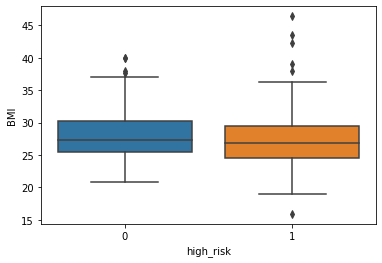

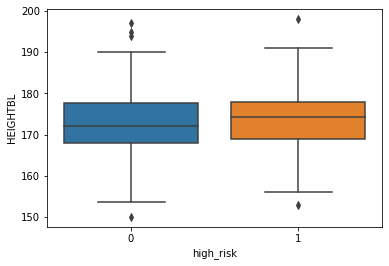

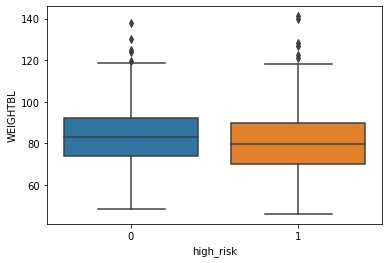

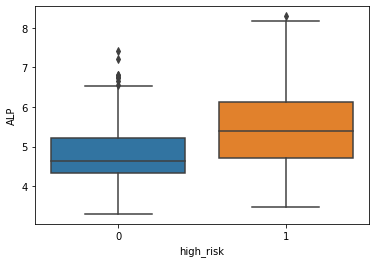

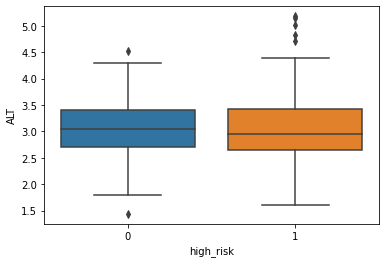

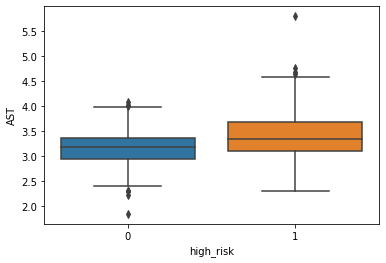

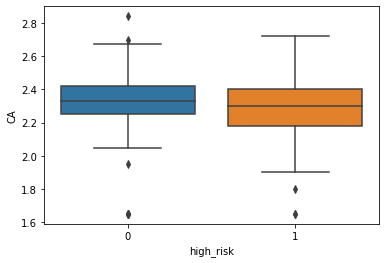

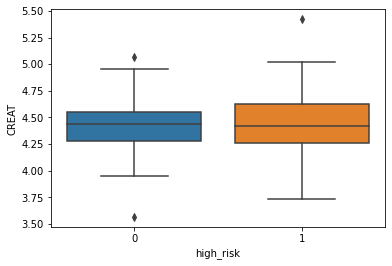

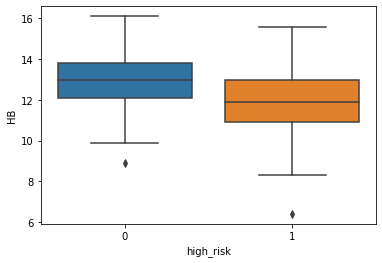

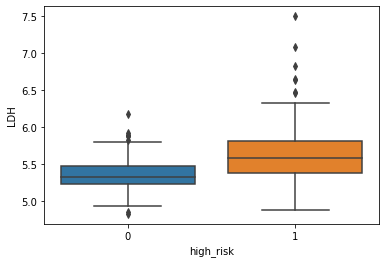

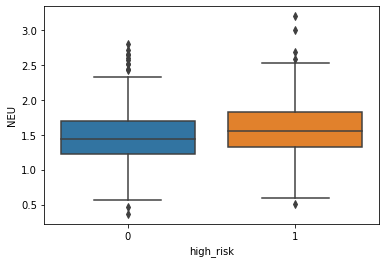

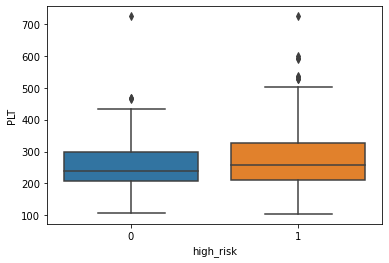

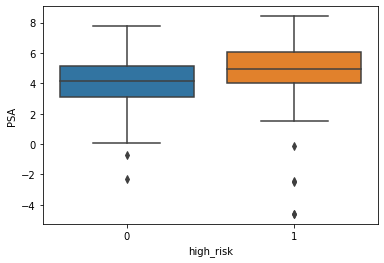

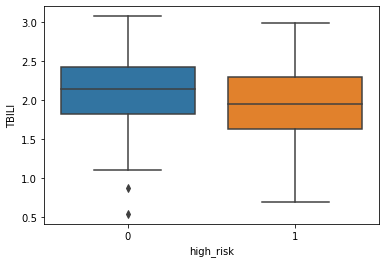

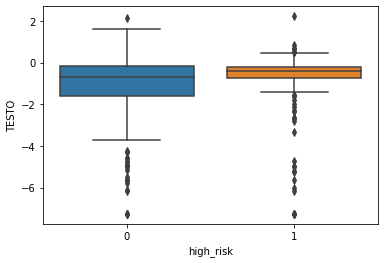

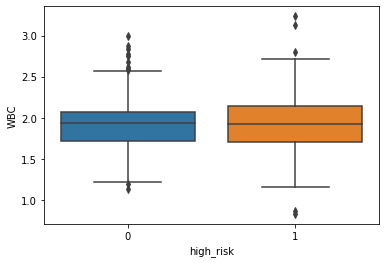

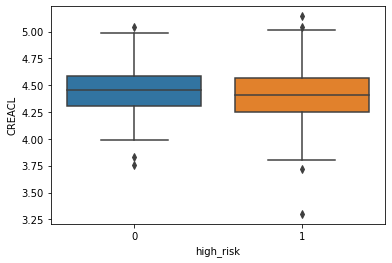

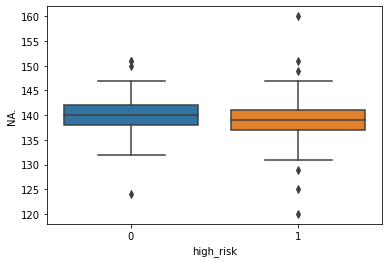

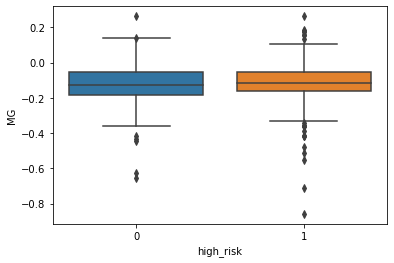

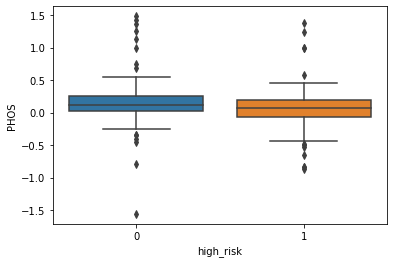

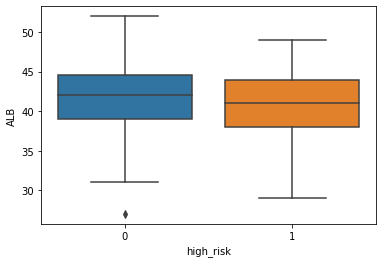

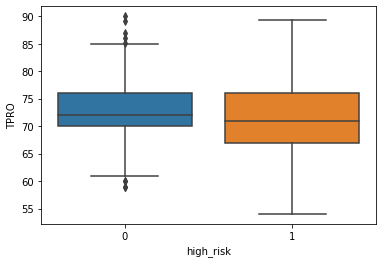

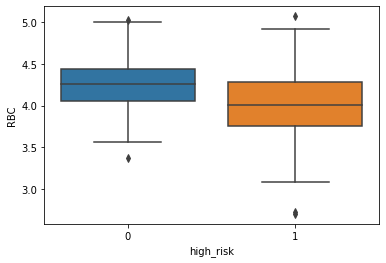

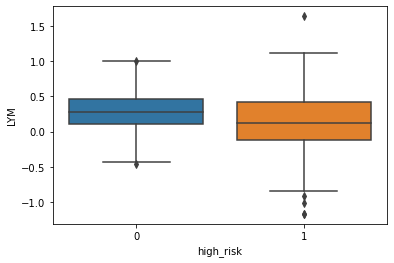

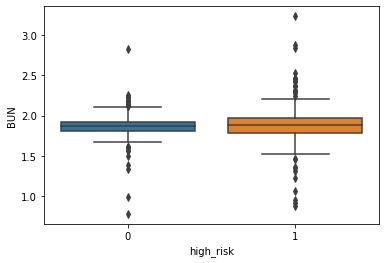

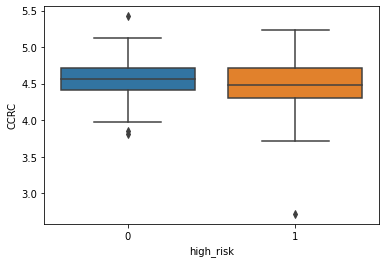

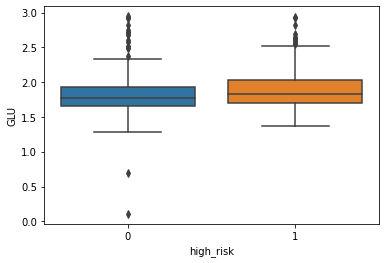

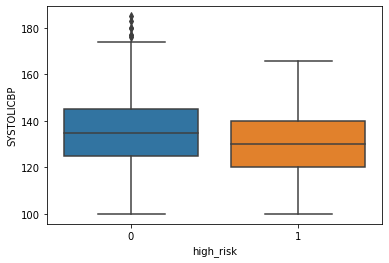

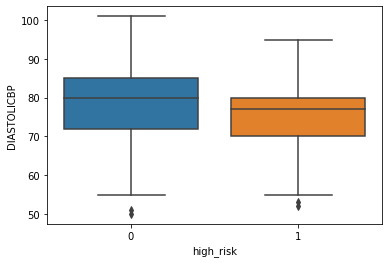

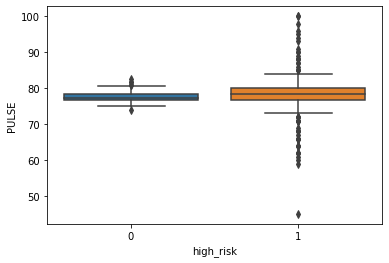

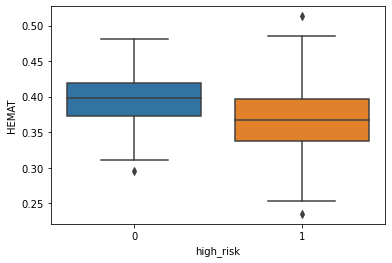

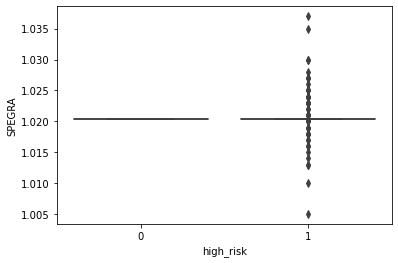

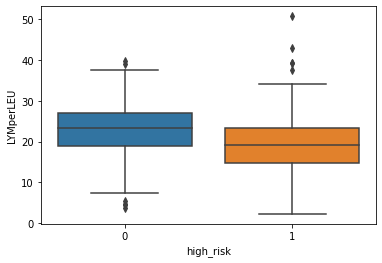

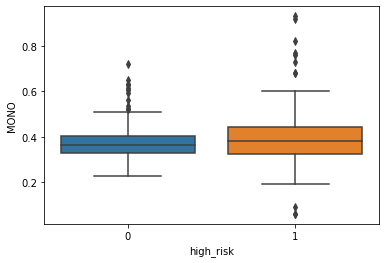

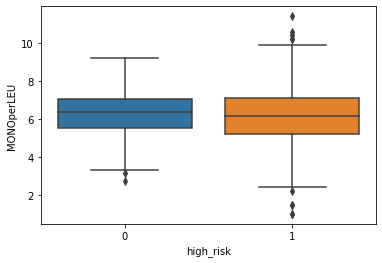

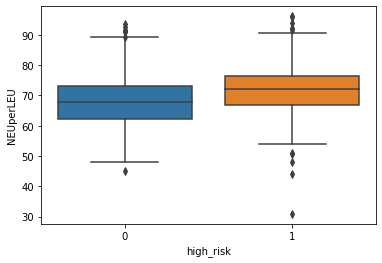

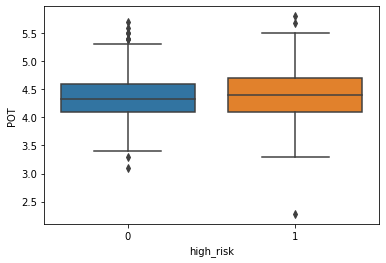

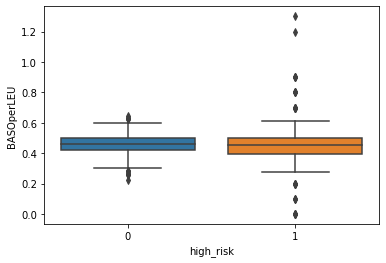

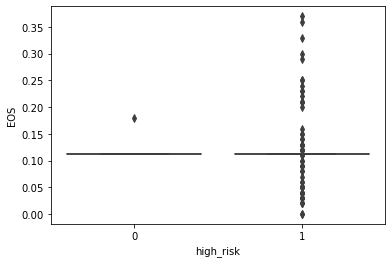

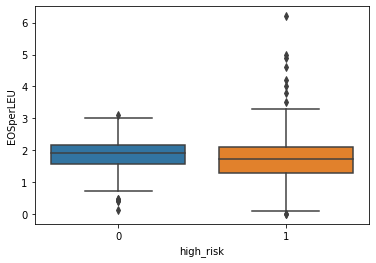

In [39]:
for feature in continous:
    analyse_continuous(feature)

In [40]:
continous_stats


,Name,Stat,p
0,BMI,1.658069,9.797352e-02
1,HEIGHTBL,-1.023862,3.064294e-01
2,WEIGHTBL,1.065282,2.872976e-01
3,ALP,-8.889920,1.331002e-17
4,ALT,-0.108714,9.134763e-01
5,AST,-6.304461,6.694016e-10
6,CA,2.538724,1.144862e-02
7,CREAT,-0.338650,7.350256e-01
8,HB,8.009269,9.233700e-15
9,LDH,-9.955314,2.635085e-21


In [41]:
continous_stats.sort_values(by='p')

,Name,Stat,p
9,LDH,-9.955314,2.635085e-21
3,ALP,-8.889920,1.331002e-17
8,HB,8.009269,9.233700e-15
22,RBC,7.564095,2.085848e-13
30,HEMAT,7.430420,5.182222e-13
5,AST,-6.304461,6.694016e-10
32,LYMperLEU,5.362853,1.289808e-07
23,LYM,4.583129,5.884280e-06
35,NEUperLEU,-4.512739,8.104881e-06
12,PSA,-4.385111,1.433071e-05


In [42]:
continous_stats[continous_stats['p'] <= 0.0005].sort_values(by='p')


,Name,Stat,p
9,LDH,-9.955314,2.635085e-21
3,ALP,-8.889920,1.331002e-17
8,HB,8.009269,9.233700e-15
22,RBC,7.564095,2.085848e-13
30,HEMAT,7.430420,5.182222e-13
5,AST,-6.304461,6.694016e-10
32,LYMperLEU,5.362853,1.289808e-07
23,LYM,4.583129,5.884280e-06
35,NEUperLEU,-4.512739,8.104881e-06
12,PSA,-4.385111,1.433071e-05
